<a href="https://colab.research.google.com/github/DavideRosatelli/Intrusion-Detection-System-Data-Poisoning/blob/main/Thesis_ids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
X_train = pd.read_csv("X_train.csv")
X_test = pd.read_csv("X_test.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")
y_multi_train = pd.read_csv("y_multi_train.csv")
y_multi_test = pd.read_csv("y_multi_test.csv")

In [2]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

Binary

In [3]:
#Creating a dictionary for storing results of each model
results_1=dict()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


score on test: 0.9038669614715152
score on train: 0.9031686265423159
              precision    recall  f1-score   support

           0       0.93      0.79      0.86     30685
           1       0.89      0.97      0.93     54343

    accuracy                           0.90     85028
   macro avg       0.91      0.88      0.89     85028
weighted avg       0.91      0.90      0.90     85028



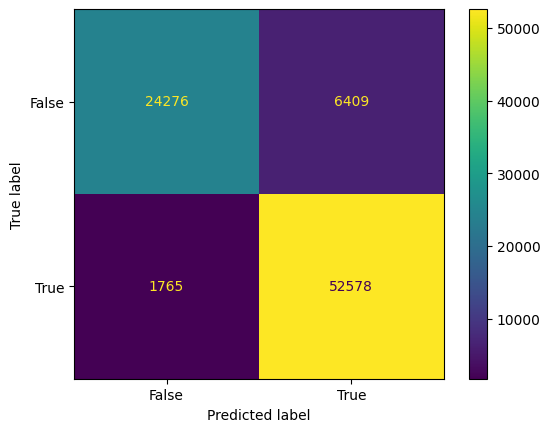

In [4]:
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
lr1=LogisticRegression()
lr1.fit(X_train, y_train)
y_pred = lr1.predict(X_test)
print("score on test: " + str(lr1.score(X_test, y_test)))
print("score on train: "+ str(lr1.score(X_train, y_train)))
print(metrics.classification_report(y_test, y_pred))
acclog=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
results_1['Logistic regression']=acclog

AUC: 0.9666


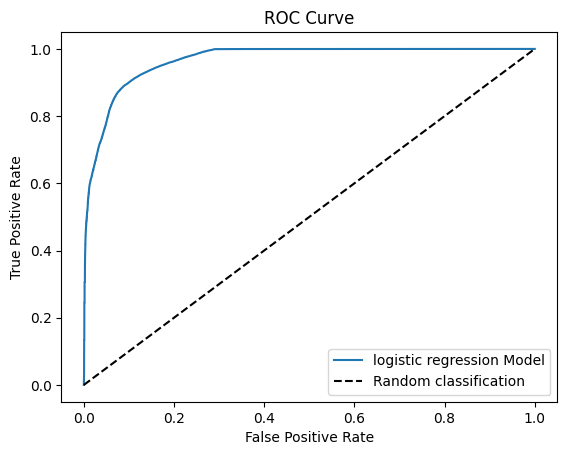

In [5]:
from sklearn.metrics import roc_auc_score,accuracy_score
from sklearn.metrics import roc_curve
# ROC curve and AUC
lr1_predproba = lr1.predict_proba(X_test)[:, 1]
AUC_lr1 = roc_auc_score(y_test, lr1_predproba)
print(f'AUC: {AUC_lr1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, lr1_predproba)
plt.plot(fpr, tpr, label='logistic regression Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

<ipython-input-6-effac5647ab1>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf1.fit(X_train, y_train)


score on test: 0.947382038857788
score on train: 0.9584544980594335
              precision    recall  f1-score   support

           0       0.92      0.93      0.93     30685
           1       0.96      0.96      0.96     54343

    accuracy                           0.95     85028
   macro avg       0.94      0.94      0.94     85028
weighted avg       0.95      0.95      0.95     85028



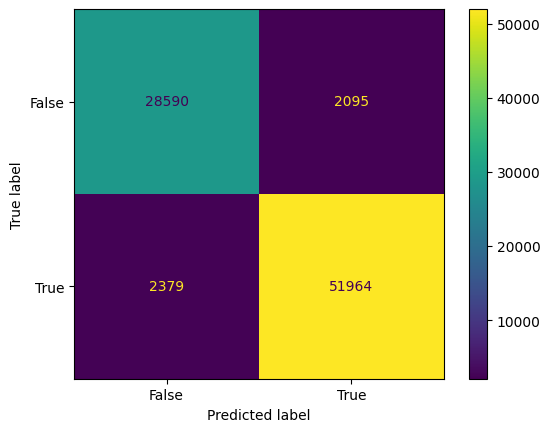

In [6]:
from sklearn.ensemble import RandomForestClassifier
import pickle
rf1 = RandomForestClassifier(n_estimators=30, max_depth=10)
rf1.fit(X_train, y_train)
y_pred = rf1.predict(X_test)
print("score on test: " + str(rf1.score(X_test, y_test)))
print("score on train: "+ str(rf1.score(X_train, y_train)))
print(metrics.classification_report(y_test, y_pred))
accrf=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
results_1['Random Forest']=accrf

AUC: 0.9906


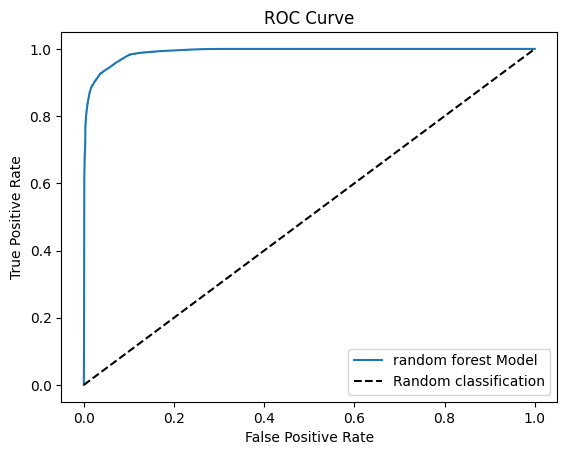

In [7]:
# ROC curve and AUC
rf1_predproba = rf1.predict_proba(X_test)[:, 1]
AUC_rf1 = roc_auc_score(y_test, rf1_predproba)
print(f'AUC: {AUC_rf1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, rf1_predproba)
plt.plot(fpr, tpr, label='random forest Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

score on test: 0.9672696053064873
score on train: 0.993280426345363
              precision    recall  f1-score   support

           0       0.97      0.94      0.95     30685
           1       0.97      0.98      0.97     54343

    accuracy                           0.97     85028
   macro avg       0.97      0.96      0.96     85028
weighted avg       0.97      0.97      0.97     85028



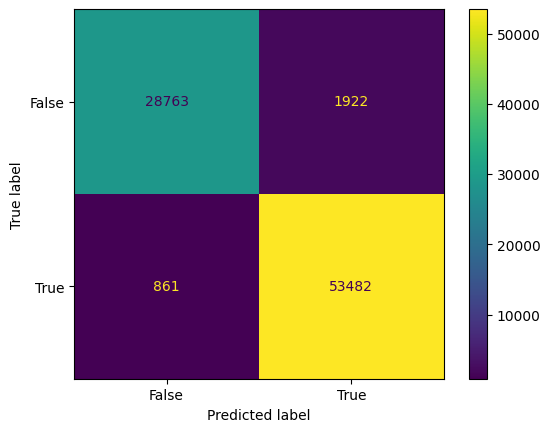

In [8]:
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, accuracy_score, precision_score, recall_score, f1_score)
import matplotlib.pyplot as plt
xgb1 = xgb.XGBClassifier(objective="binary:logistic", random_state=42)
xgb1.fit(X_train, y_train)
y_pred = xgb1.predict(X_test)
print("score on test: " + str(xgb1.score(X_test, y_test)))
print("score on train: "+ str(xgb1.score(X_train, y_train)))
print(metrics.classification_report(y_test, y_pred))
accboost=sklearn.metrics.accuracy_score(y_test, y_pred)
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()
results_1['Gradient Boosting']=accboost

AUC: 0.9950


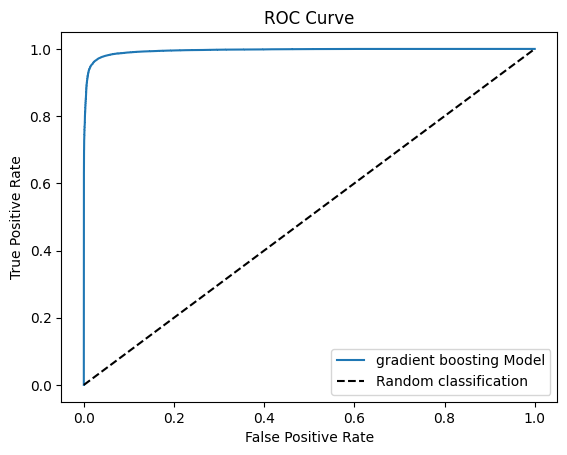

In [9]:
# ROC curve and AUC
xgb1_predproba = xgb1.predict_proba(X_test)[:, 1]
AUC_xgb1 = roc_auc_score(y_test, xgb1_predproba)
print(f'AUC: {AUC_xgb1:.4f}')
# Compute false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, xgb1_predproba)
plt.plot(fpr, tpr, label='gradient boosting Model')
plt.plot([0, 1], [0, 1], 'k--', label='Random classification')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.1625 - accuracy: 0.9221
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1299 - accuracy: 0.9386
Epoch 3/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1201 - accuracy: 0.9432
Epoch 4/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.1042 - accuracy: 0.9529
Epoch 5/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0918 - accuracy: 0.9596
Epoch 6/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0844 - accuracy: 0.9643
Epoch 7/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0796 - accuracy: 0.9662
Epoch 8/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0755 - accuracy: 0.9680
Epoch 9/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.0727 - accuracy: 0.9691
Epoch 10/100
1349/1349 [==============================] - 2s 2ms/step - l

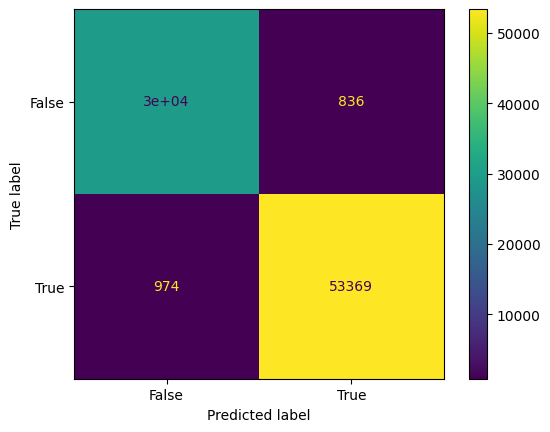

In [10]:
import keras
from keras import layers
from keras import models
from keras import optimizers
from keras import losses
from keras import callbacks
from keras import metrics

model=models.Sequential()
model.add(layers.Dense(128,activation='relu',input_shape=(42,)))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)
model.fit(X_train, y_train, batch_size=128, epochs=100, callbacks=[earlystopping])

y_pred = model.predict(X_test)
print("score on test: " + str(model.evaluate(X_test,y_test)[1]))
print("score on train: "+ str(model.evaluate(X_train,y_train)[1]))

scores = model.evaluate(X_test, y_test, verbose=0)
results_1['Neural Network']=scores[1]

from sklearn import metrics
y_pred_mat = y_pred.round()
confusion_matrix = metrics.confusion_matrix(y_test, y_pred_mat)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

In [11]:
import numpy as np
y_true_int = y_test.values.ravel()
y_pred_int = y_pred.round().ravel().astype('int')
report = metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     30685
           1       0.98      0.98      0.98     54343

    accuracy                           0.98     85028
   macro avg       0.98      0.98      0.98     85028
weighted avg       0.98      0.98      0.98     85028



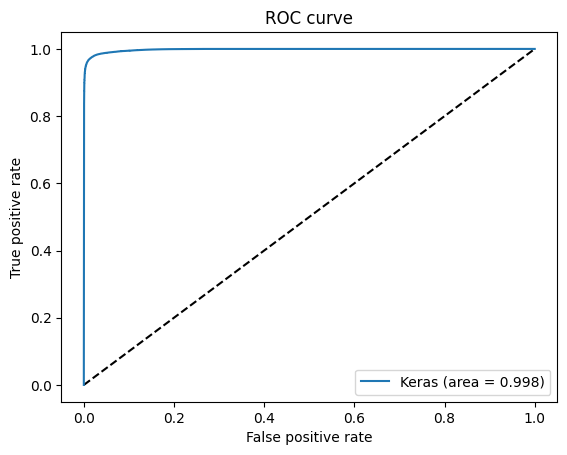

In [12]:
from sklearn.metrics import auc
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred)
auc_keras = auc(fpr_keras, tpr_keras)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Keras (area = {:.3f})'.format(auc_keras))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()

In [13]:
#accuracies plot
import plotly.express as px
algs = list(results_1.keys())
accuracies = list(results_1.values())
finalplot=px.scatter(x=algs,y=accuracies,title='Comparison of accuracies for each model in the binary task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Models',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()

Multiclass

In [14]:
results_2=dict()

In [15]:
attack_cat=['Normal', 'Generic', 'Exploits', 'Fuzzers', 'DoS', 'Reconnaissance', 'Analysis', 'Backdoor', 'Shellcode', 'Worms']
import numpy as np
import itertools
def plot_confusion_matrix(cm, target_names, title='Confusion matrix', cmap=None, normalize=True):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy
    if cmap is None:
        cmap = plt.get_cmap('Blues')
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.2f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

score on test: 0.44141929717269607
score on train: 0.8190291374616231


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

           0       0.84      0.67      0.75     30685
           1       0.43      0.00      0.00     19493
           2       0.31      0.85      0.45     14798
           3       0.45      0.43      0.44      7903
           4       0.03      0.04      0.03      5312
           5       0.60      0.16      0.25      4653
           6       0.01      0.02      0.01       850
           7       0.06      0.01      0.02       771
           8       0.03      0.11      0.05       509
           9       0.00      0.00      0.00        54

    accuracy                           0.44     85028
   macro avg       0.28      0.23      0.20     85028
weighted avg       0.53      0.44      0.41     85028



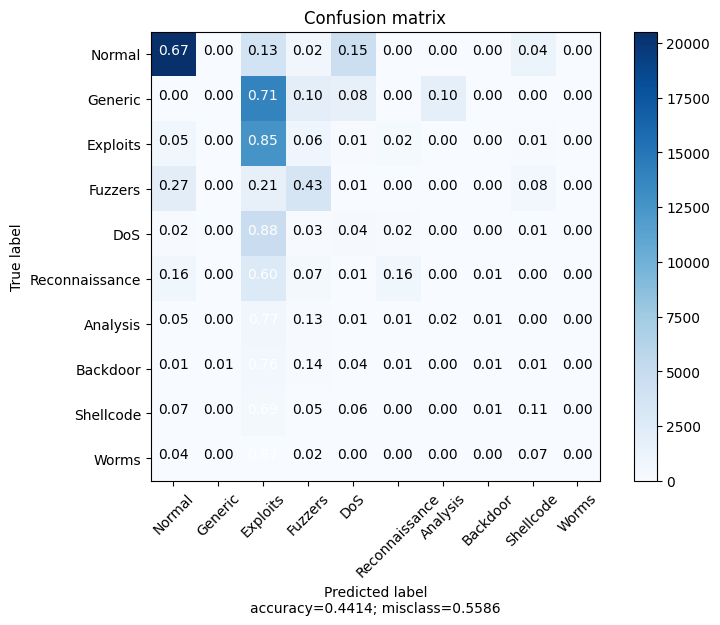

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree1 = DecisionTreeClassifier(max_depth = 10).fit(X_train, y_multi_train)
y_pred = dtree1.predict(X_test)
print("score on test: " + str(dtree1.score(X_test, y_multi_test)))
print("score on train: "+ str(dtree1.score(X_train, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
acctree=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
results_2['Decision Tree']=acctree

In [17]:
import yellowbrick
from yellowbrick.classifier import ROCAUC

def plot_ROC_curve(model, xtrain, ytrain, xtest, ytest):
    # Creating visualization
    visualizer = ROCAUC(model)
    # Fitting to the training data first then scoring with the test data
    visualizer.fit(xtrain, ytrain)
    visualizer.score(xtest, ytest)
    visualizer.show()
    return visualizer

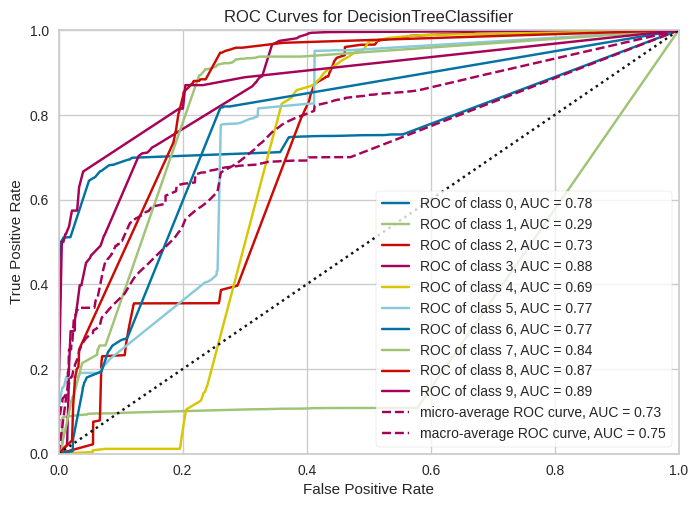

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=DecisionTreeClassifier(max_depth=10))

In [18]:
plot_ROC_curve(dtree1, X_train, y_multi_train, X_test, y_multi_test)

<ipython-input-19-8e614fe3c898>:2: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



score on test: 0.815143246930423
score on train: 0.8285813589758443
              precision    recall  f1-score   support

           0       0.91      0.95      0.93     30685
           1       1.00      0.97      0.98     19493
           2       0.59      0.90      0.72     14798
           3       0.61      0.60      0.61      7903
           4       0.53      0.01      0.03      5312
           5       0.85      0.65      0.74      4653
           6       1.00      0.00      0.00       850
           7       1.00      0.00      0.00       771
           8       0.79      0.06      0.11       509
           9       0.00      0.00      0.00        54

    accuracy                           0.82     85028
   macro avg       0.73      0.42      0.41     85028
weighted avg       0.82      0.82      0.78     85028



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



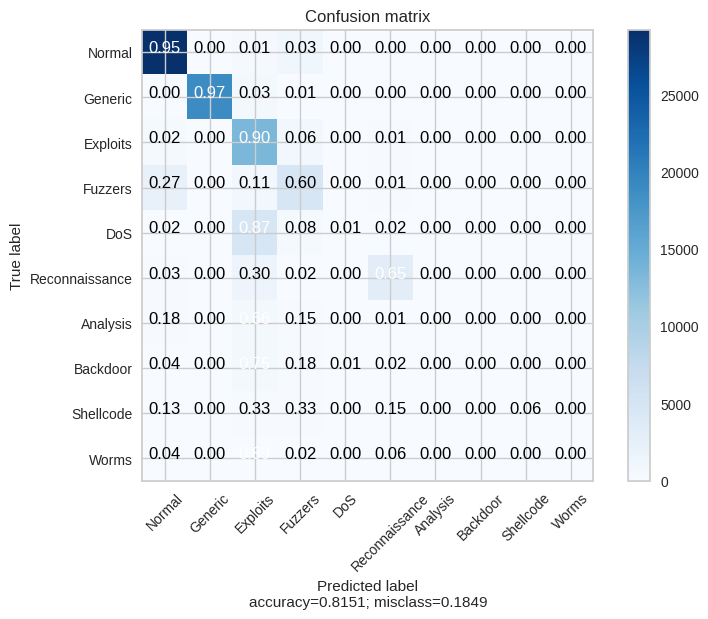

In [19]:
from sklearn.ensemble import RandomForestClassifier
rf2 = RandomForestClassifier(n_estimators=30, max_depth=10).fit(X_train, y_multi_train)
y_pred = rf2.predict(X_test)
print("score on test: " + str(rf2.score(X_test, y_multi_test)))
print("score on train: "+ str(rf2.score(X_train, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
accuracy = rf2.score(X_test, y_multi_test)
accrf=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
results_2['Random Forest']=accrf

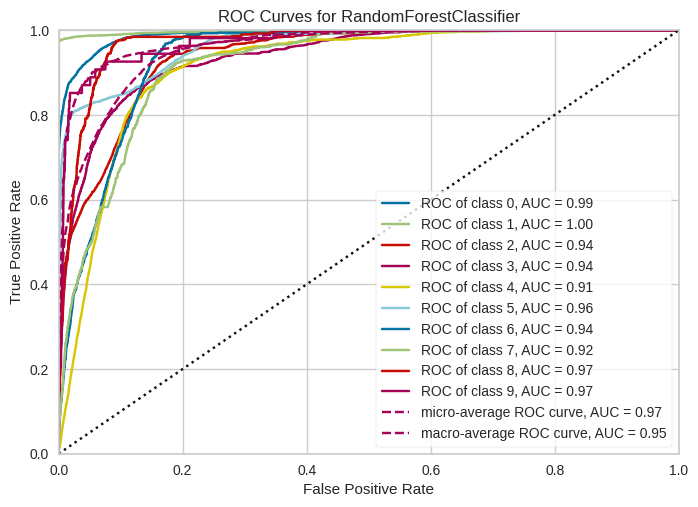

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=RandomForestClassifier(max_depth=10, n_estimators=30))

In [20]:
plot_ROC_curve(rf2, X_train, y_multi_train, X_test, y_multi_test)

score on test: 0.79550265794797
score on train: 0.8980536407345189
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     30685
           1       1.00      0.85      0.91     19493
           2       0.60      0.85      0.70     14798
           3       0.60      0.75      0.67      7903
           4       0.12      0.07      0.09      5312
           5       0.86      0.65      0.74      4653
           6       0.58      0.07      0.13       850
           7       0.25      0.02      0.03       771
           8       0.58      0.33      0.42       509
           9       0.75      0.11      0.19        54

    accuracy                           0.80     85028
   macro avg       0.63      0.46      0.48     85028
weighted avg       0.80      0.80      0.79     85028



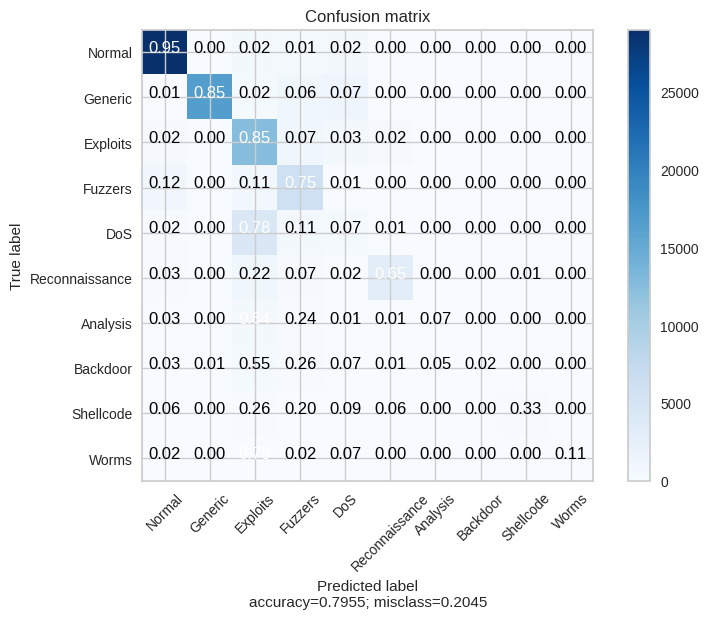

In [21]:
xgb2 = xgb.XGBClassifier(objective="multi:softprob", random_state=42)
xgb2.fit(X_train, y_multi_train)
y_pred = xgb2.predict(X_test)
print("score on test: " + str(xgb2.score(X_test, y_multi_test)))
print("score on train: "+ str(xgb2.score(X_train, y_multi_train)))
print(metrics.classification_report(y_multi_test, y_pred))
accboost=sklearn.metrics.accuracy_score(y_multi_test, y_pred)
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)
results_2['Gradient Boosting']=accboost

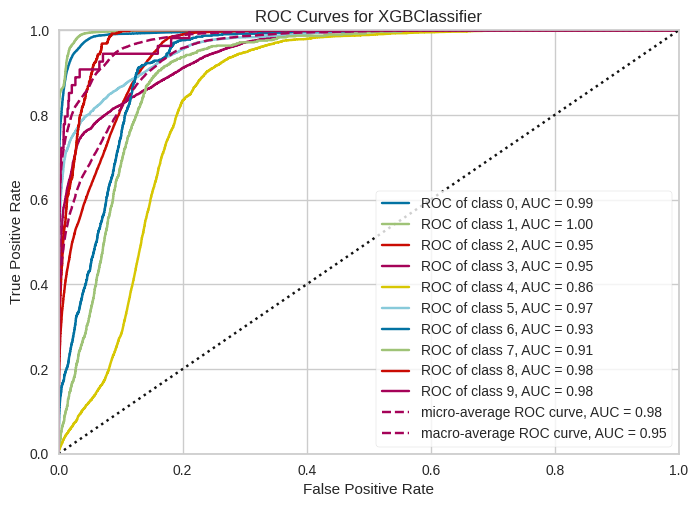

ROCAUC(ax=<Axes: title={'center': 'ROC Curves for XGBClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>,
       estimator=XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, g...
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=100,
                               n_jobs=None, num_parallel_tree=None,
                               objective='multi:softprob', predictor=None, ...))

In [22]:
plot_ROC_curve(xgb2, X_train, y_multi_train, X_test, y_multi_test)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               5504      
                                                                 
 dense_5 (Dense)             (None, 64)                8256      
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 10)                650       
                                                                 
Total params: 18,570
Trainable params: 18,570
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
1349/1349 [==============================] - 3s 2ms/step - loss: 0.6458 - accuracy: 0.7598
Epoch 2/100
1349/1349 [==============================] - 2s 2ms/step - loss: 0.

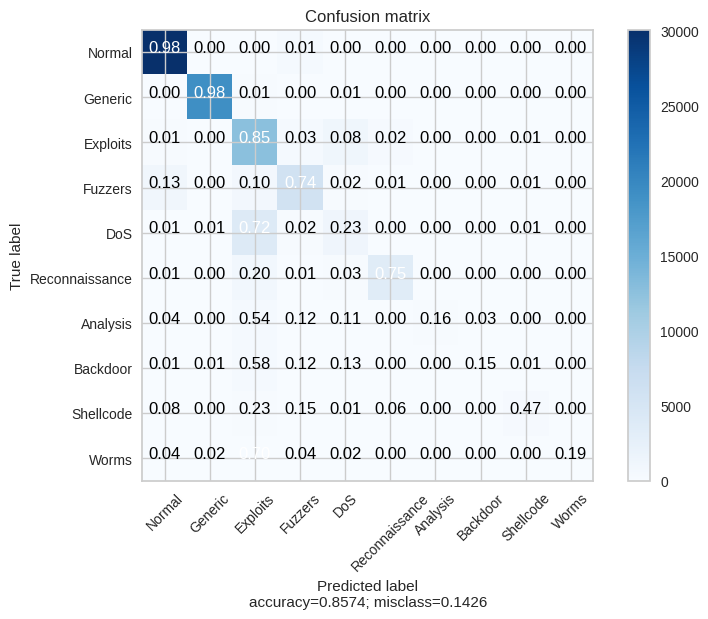

In [23]:
from keras import metrics
model2 = models.Sequential()
model2.add(layers.Dense(128, input_shape = (42,), activation = "relu"))
model2.add(layers.Dense(64, activation = "relu"))
model2.add(layers.Dense(64,activation="relu"))
model2.add(layers.Dense(10, activation = "softmax"))
model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics = ["accuracy"])
model2.summary()

earlystopping = callbacks.EarlyStopping(monitor="loss",
                                        mode="min", patience=5,
                                        restore_best_weights=True)

model2.fit(X_train,y_multi_train,epochs=100,batch_size=128,callbacks=[earlystopping])
y_pred_arr = model2.predict(X_test)

y_pred = np.argmax(y_pred_arr, axis=1)

print("score on test: " + str(model2.evaluate(X_test,y_multi_test)[1]))
print("score on train: "+ str(model2.evaluate(X_train,y_multi_train)[1]))
scores = model2.evaluate(X_test, y_multi_test, verbose=0)
results_2['Neural Network']=scores[1]
cm = confusion_matrix(y_multi_test, y_pred)
plot_confusion_matrix(cm, attack_cat)

In [24]:
y_true_int = y_multi_test.values.ravel()
y_pred_int = y_pred.copy()

report = sklearn.metrics.classification_report(y_true_int, y_pred_int)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.98      0.97     30685
           1       0.99      0.98      0.99     19493
           2       0.65      0.85      0.74     14798
           3       0.82      0.74      0.78      7903
           4       0.42      0.23      0.30      5312
           5       0.90      0.75      0.82      4653
           6       0.74      0.16      0.26       850
           7       0.68      0.15      0.24       771
           8       0.55      0.47      0.51       509
           9       0.53      0.19      0.27        54

    accuracy                           0.86     85028
   macro avg       0.72      0.55      0.59     85028
weighted avg       0.85      0.86      0.85     85028



ROC AUC score: 0.9734376502625656


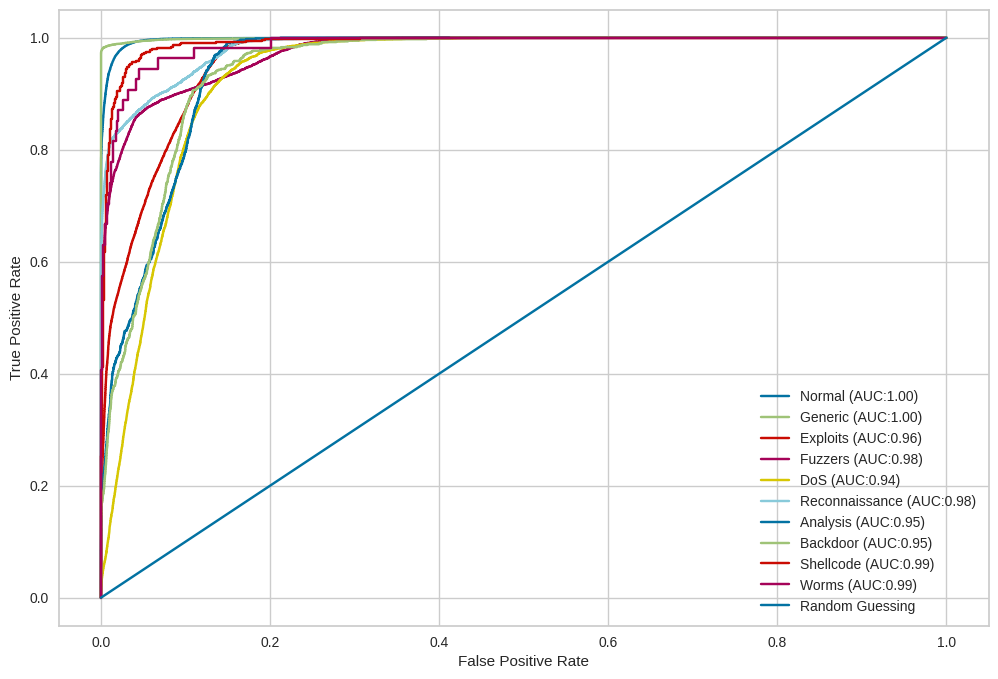

In [25]:
fig, c_ax = plt.subplots(1,1, figsize = (12, 8))
from sklearn.preprocessing import LabelBinarizer

# function for scoring roc auc score for multi-class
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)

    for (idx, c_label) in enumerate(attack_cat):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'b-', label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)


print('ROC AUC score:', multiclass_roc_auc_score(y_multi_test, y_pred_arr))

c_ax.legend()
c_ax.set_xlabel('False Positive Rate')
c_ax.set_ylabel('True Positive Rate')
plt.show()

In [26]:
#accuracies plot
algs = list(results_2.keys())
accuracies = list(results_2.values())
finalplot=px.scatter(x=algs,y=accuracies,title='Comparison of accuracies for each model in the multiclass task')
finalplot.update_layout(xaxis_tickangle=0, xaxis_title = 'Models',yaxis_title='Accuracy (%)')
finalplot.update_layout(uniformtext_minsize=0)
finalplot.show()